# 02_Análise_dados_clusterizacao

## 01_import_bibliotecas

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import requests
from sklearn.impute import SimpleImputer

## 02_Carga_de_dados

In [17]:
# === Caminho do arquivo parquet
input = "https://github.com/Kinrider/tech_challenge_5/raw/refs/heads/main/01_fontes/arquivos_decision/fontes_tratadas/02_cluster_input.parquet"

In [18]:
df_cluster_input = pd.read_parquet(input)

## 03_Tratamento_analise

In [19]:
# === Garantir dados numéricos e remover colunas totalmente vazias
df_cluster_input = df_cluster_input.apply(pd.to_numeric, errors="coerce")
df_cluster_input = df_cluster_input.dropna(axis=1, how="all")

In [20]:
# === Padronização dos dados
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df_cluster_input)
X_scaled_raw = scaler.fit_transform(df_cluster_input)
imputer = SimpleImputer(strategy="mean")
X_scaled = imputer.fit_transform(X_scaled_raw)

In [21]:
# === Avaliação do número ideal de clusters
inertia = []
silhouette = []
k_values = range(2, 11)

In [22]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

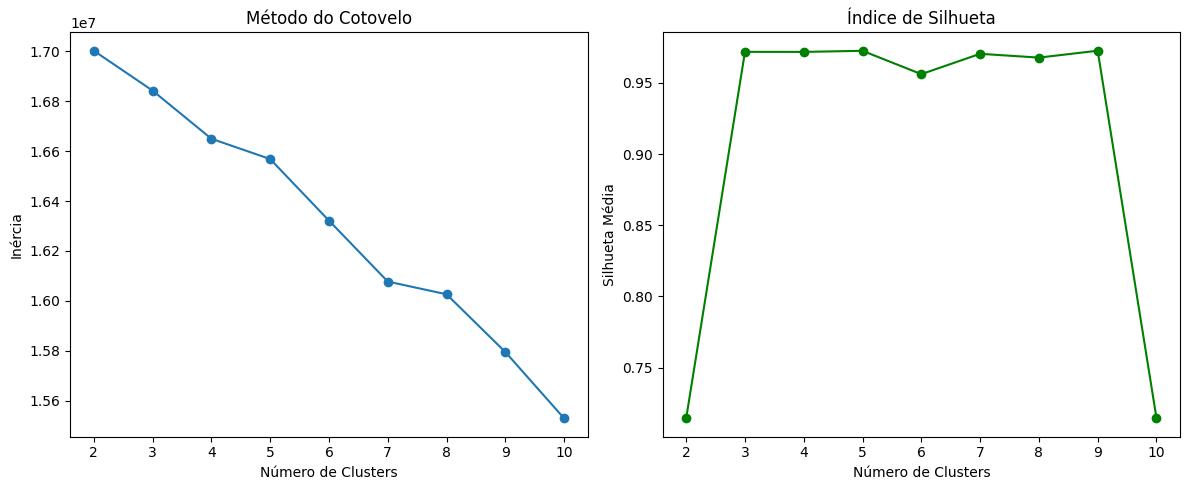

In [23]:
# === Visualização dos resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette, marker='o', color='green')
plt.title("Índice de Silhueta")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhueta Média")

plt.tight_layout()
plt.show()